## Final Project Submission

Please fill out:
* Student name: Michael Holthouser
* Student pace: self paced 
* Scheduled project review date/time: 
* Instructor name: Claude Fried
* Blog post URL:

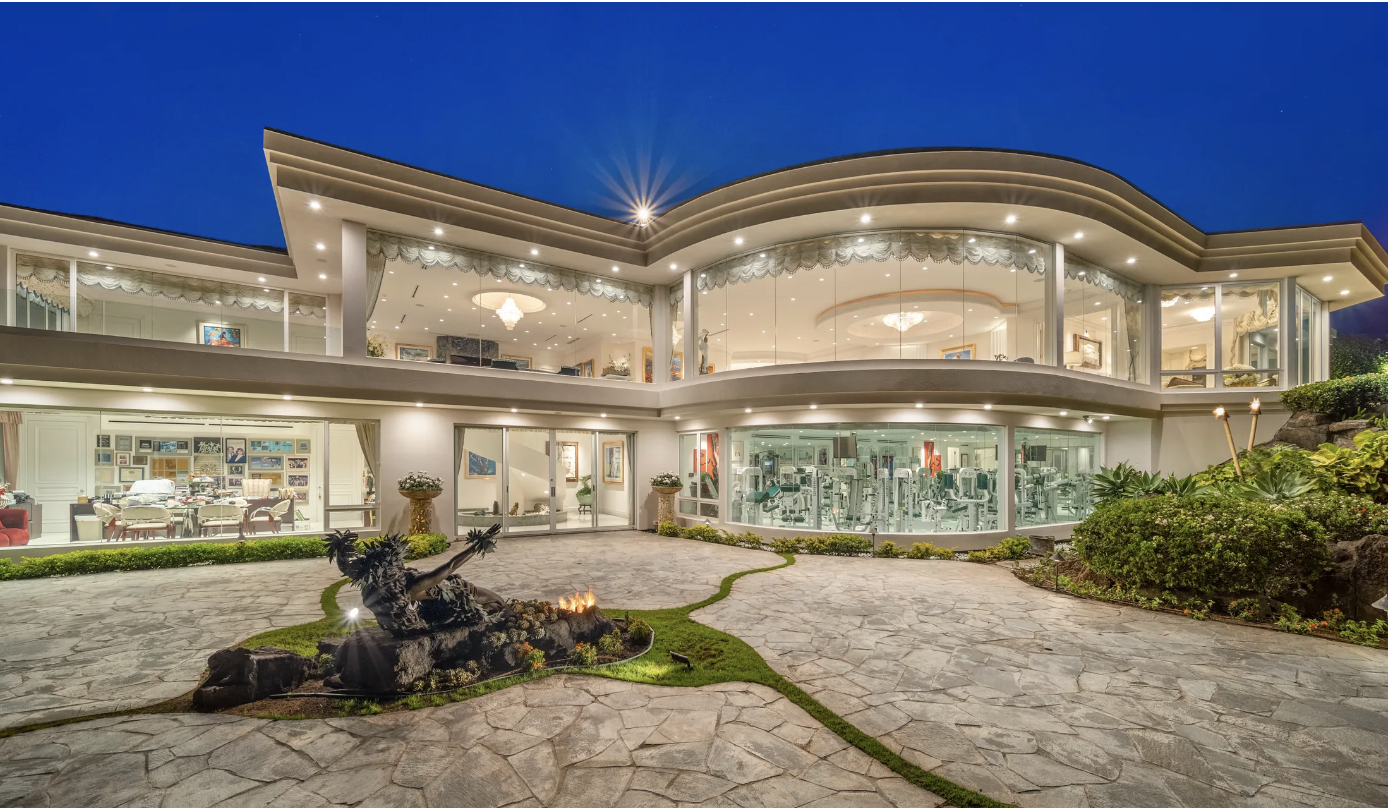

# Home Renovation Recommendations
---

### Author: Michael Holthouser

## Overview
---
I have been tasked with analyzing housing data for King County Washington. My goal is to provide information for a real estate agency to help homeowners with recommendation on helpful renovations to increase the selling price of their homes. With the use of multiple linear regression modeling, I am hopeful to give insight on which home renovations are best prioritized in terms of increasing the sale price. 

## Business Problem
---
King County Realtors needs guidance on assisting clients with recommendations on which home renovations may increase the estimated value of their homes. 
- Stakeholder: King County Realtors

- Business Question: Which home renovations might increase the estimated value of their homes, and by what amount?



## The Data
---

This data comes from the King County House Sales dataset which is available on the King County Open Data King County Open Data. The data includes all data of single-family home sales from 2014-2015.

The features that I will be investigating are the following:

- `price` - sales price
- `bedrooms` - Number of bedrooms
- `bathrooms` - Number of bathrooms
- `sqft_living` - Square footbage of living space in the home
- `sqft_lot` - Square footage of the lot
- `floors` - Number of floors (levels) in house
- `waterfront` - whether the house is on a waterfront
- `grade` - Overall grade of the house. Related to the construction and design of the house
- `yr_built` - Year when house was built

### Import packages and libraries


In [453]:
# import packages and libraries
import pandas as pd
import numpy as np
from numpy.random import randn
import seaborn as sns
sns.set(style='dark')
plt.style.use('seaborn')

from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import statsmodels.api as sm
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

### Import the data

In [454]:
kchd = pd.read_csv("kc_house_data.csv", usecols=["price", "bedrooms", "bathrooms", "sqft_living", "sqft_lot", 
                                                       "floors", "waterfront", "grade", "condition", "yr_built"])
kchd.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
0,221900.00,3,1.00,1180,5650,1.00,NaN,Average,7 Average,1955
1,538000.00,3,2.25,2570,7242,2.00,NO,Average,7 Average,1951
2,180000.00,2,1.00,770,10000,1.00,NO,Average,6 Low Average,1933
3,604000.00,4,3.00,1960,5000,1.00,NO,Very Good,7 Average,1965
4,510000.00,3,2.00,1680,8080,1.00,NO,Average,8 Good,1987


## Data Cleaning
---

In [455]:
## Get info of the data frame 
kchd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  object 
 7   condition    21597 non-null  object 
 8   grade        21597 non-null  object 
 9   yr_built     21597 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 1.6+ MB


First observations are that I do appear to have some missing values in the waterfront column, and I also have three columns that I will need to change from an object data type into a numerical data type in order to run a linear regression. 

In [456]:
## Get descriptive stats
kchd.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,540296.57,3.37,2.12,2080.32,15099.41,1.49,1971.00
std,367368.14,0.93,0.77,918.11,41412.64,0.54,29.38
min,78000.00,1.00,0.50,370.00,520.00,1.00,1900.00
25%,322000.00,3.00,1.75,1430.00,5040.00,1.00,1951.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,1975.00
75%,645000.00,4.00,2.50,2550.00,10685.00,2.00,1997.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,2015.00


From this statistics table, there are a some outliers that will need to be addressed as well.  For example, 33 bedrooms. 

### Remove unncessary columns: sqft_lot and yr_built

In [457]:
kchd.drop(columns = ['sqft_lot', 'yr_built'], inplace=True)

In [458]:
## Check to see if dropped columns have been removed 
kchd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   floors       21597 non-null  float64
 5   waterfront   19221 non-null  object 
 6   condition    21597 non-null  object 
 7   grade        21597 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 1.3+ MB


### Check for missing value

In [459]:
kchd.isna().sum()

price             0
bedrooms          0
bathrooms         0
sqft_living       0
floors            0
waterfront     2376
condition         0
grade             0
dtype: int64

In [460]:
# Check the unique values of the waterfront column
kchd['waterfront'].unique()

array([nan, 'NO', 'YES'], dtype=object)

In [461]:
# Get a value count of each entry in waterfront
kchd['waterfront'].value_counts(dropna=False)

NO     19075
NaN     2376
YES      146
Name: waterfront, dtype: int64

Since 19,075 of 21,597 entries (about 88%) of the homes have NO for waterfront, we can assume that the 2,376 NaN columns can be filled with NO. 

In [462]:
# Change all NaN values withe "NO"
kchd['waterfront'].fillna("NO", inplace=True)

In [463]:
# Check to see if NaN values have been changed 
kchd['waterfront'].value_counts(dropna=False)

NO     21451
YES      146
Name: waterfront, dtype: int64

In [464]:
# # Convert the waterfront column to the data type int, and make YES = 1 and NO = 0
kchd['waterfront'] = kchd['waterfront'].map({'YES': 1, 'NO': 0})

I obtain the code above from stackover flow
https://stackoverflow.com/questions/40901770/is-there-a-simple-way-to-change-a-column-of-yes-no-to-1-0-in-a-pandas-dataframe

In [465]:
kchd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   floors       21597 non-null  float64
 5   waterfront   21597 non-null  int64  
 6   condition    21597 non-null  object 
 7   grade        21597 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 1.3+ MB


### Checking for outliers

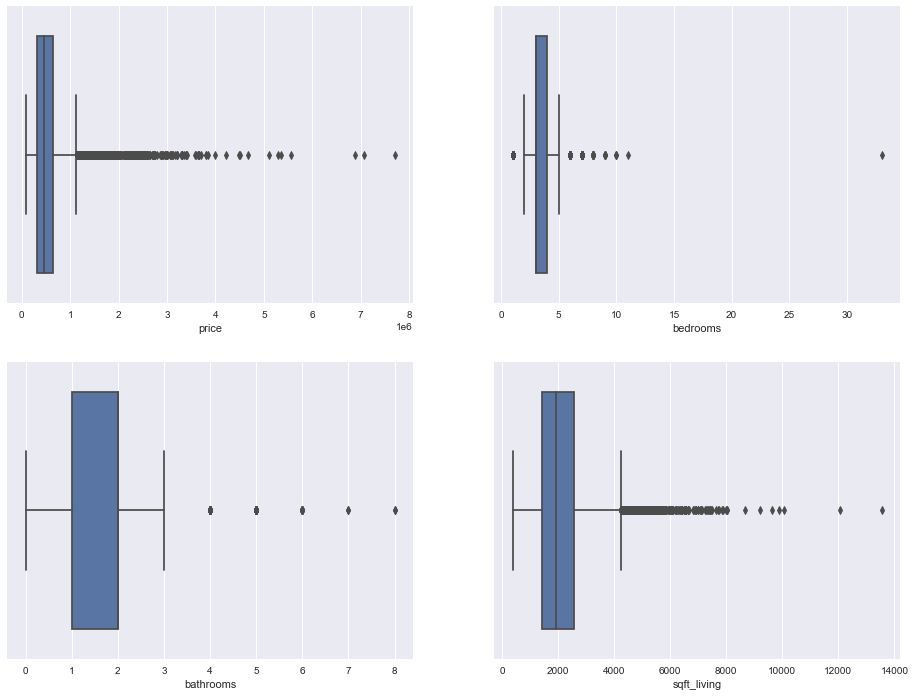

In [466]:
# Box plots on features where outliers exist
plt.figure(figsize=(16, 12))
plt.subplot(221)
sns.boxplot(kchd['price'])
plt.subplot(222)
sns.boxplot(kchd['bedrooms'])
plt.subplot(223)
sns.boxplot(kchd.bathrooms.astype('int'))
plt.subplot(224)
sns.boxplot(kchd['sqft_living'])
sns.set_theme(style="whitegrid");


In [467]:
# Value count of bedrooms
kchd['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Since there is only one entry with 33 bedrooms, I will simply delete that row. 

In [468]:
kchd = kchd[(kchd.bedrooms != 33)]

#Check if record has been removed
kchd['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

### Scatter matrix to check if variables are normally distributed

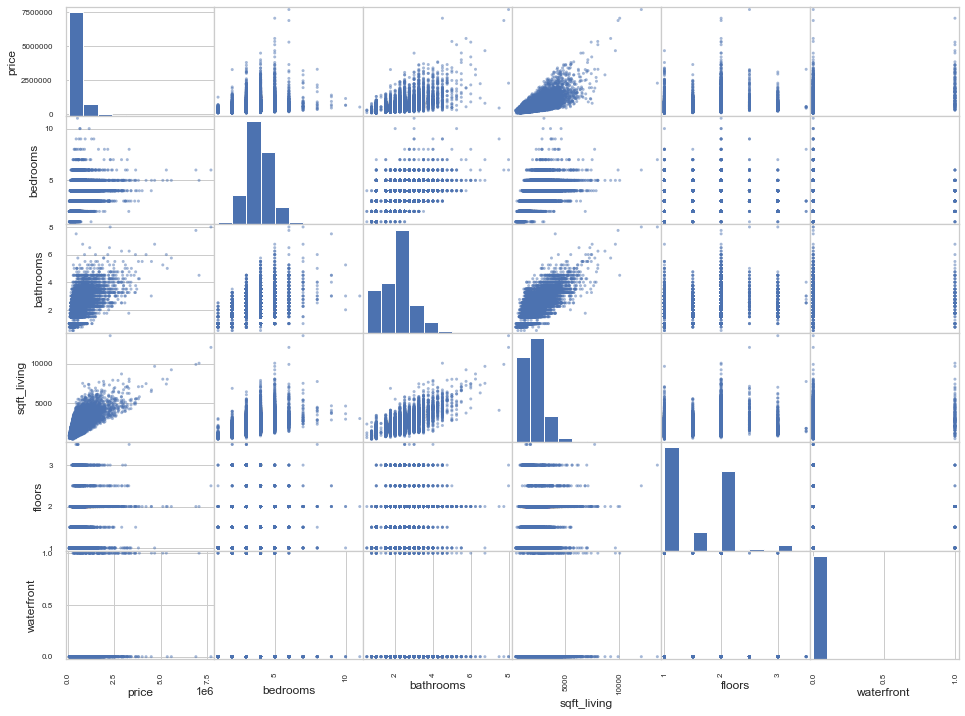

In [469]:
# Scatter Matrix 
pd.plotting.scatter_matrix(kchd, figsize=(16, 12));

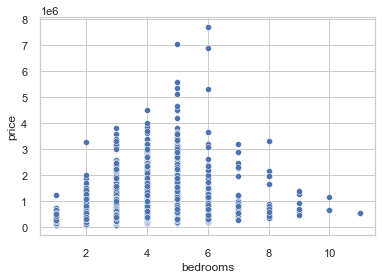

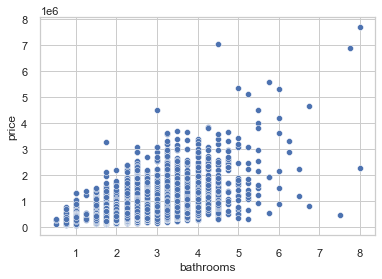

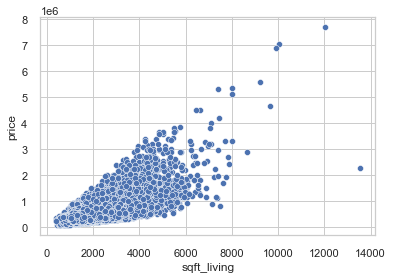

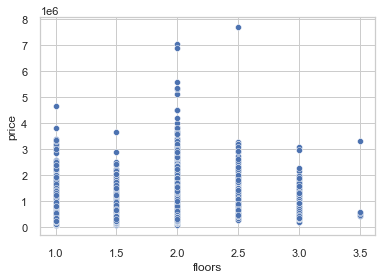

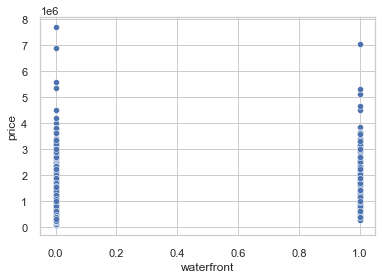

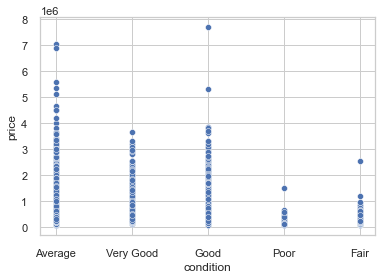

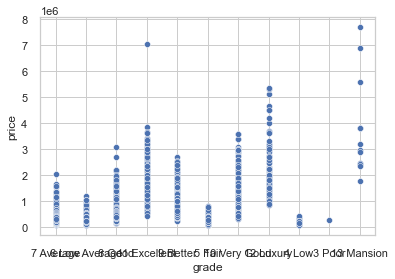

In [470]:
for c in kchd.columns:
    if c =='price':
        continue
    sns.scatterplot(x=c, y='price', data=kchd);
    plt.show()

### Change data types of grade and condition columns

In [471]:
kchd['grade'].unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [472]:
## split the string from the number in order to change the the data type to int
kchd['grade'] = kchd['grade'].str.split(n=1, expand=True)[0].astype(int)
kchd['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13])

In [473]:
kchd['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [474]:
kchd['condition'] = kchd['condition'].map({'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4, 'Very Good': 5})
kchd['condition'].unique()

array([3, 5, 4, 1, 2])

In [475]:
## Check if all data types are of a numeric data type
kchd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21596 non-null  float64
 1   bedrooms     21596 non-null  int64  
 2   bathrooms    21596 non-null  float64
 3   sqft_living  21596 non-null  int64  
 4   floors       21596 non-null  float64
 5   waterfront   21596 non-null  int64  
 6   condition    21596 non-null  int64  
 7   grade        21596 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.5 MB


## Modeling
---

### Correlation of the independent variables (features) with the dependant variable (target)


In [476]:
price_corr = kchd.corr()['price'].map(abs).sort_values(ascending=False)
price_corr

price         1.00
sqft_living   0.70
grade         0.67
bathrooms     0.53
bedrooms      0.32
waterfront    0.26
floors        0.26
condition     0.04
Name: price, dtype: float64

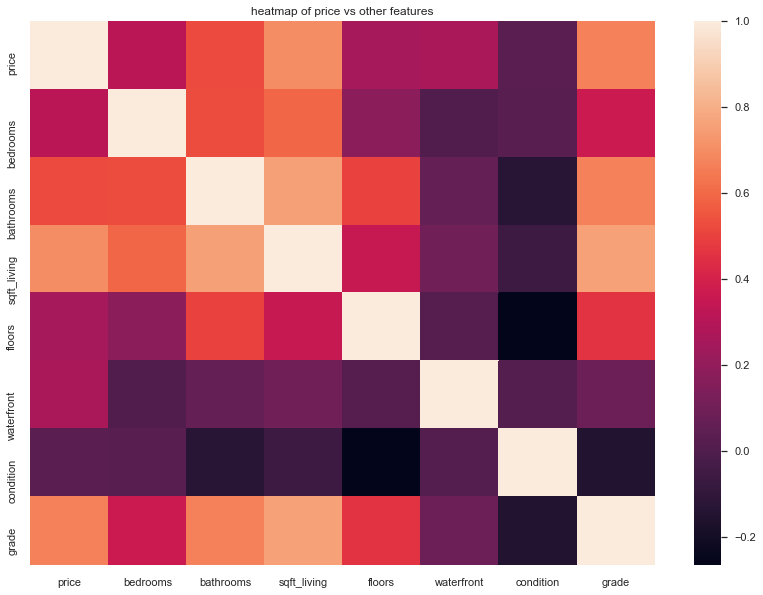

In [477]:
## Heat map to visualize the strongest correlations
# Use the .heatmap method to depict the relationship visually
plt.figure(figsize=(14,10))
sns.heatmap(kchd.corr());
plt.title('heatmap of price vs other features')
plt.show()

Taking a look of the heat map, where the lighter the color means a stronger correlation. With price as the dependant variable, sqft_living, grade, and bathrooms have the strongest correlations. 

In [478]:
kchd.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade
0,221900.00,3,1.00,1180,1.00,0,3,7
1,538000.00,3,2.25,2570,2.00,0,3,7
2,180000.00,2,1.00,770,1.00,0,3,6
3,604000.00,4,3.00,1960,1.00,0,5,7
4,510000.00,3,2.00,1680,1.00,0,3,8


## Baseline Model

Since sqft_living has the strongest relationship with price, I will use sqft_living in my baseline model. 

In [479]:
# Create continuous and categorical variables
continuous = ['sqft_living', 'price']
categoricals = ['waterfront', 'grade', 'bedrooms', 'bathrooms', 'condition', 'floors']

In [480]:
# Single Linear Regression
y = kchd['price']
X = sm.add_constant(kchd['sqft_living'])
X.head()

,const,sqft_living
0,1.00,1180
1,1.00,2570
2,1.00,770
3,1.00,1960
4,1.00,1680


In [481]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:19:43   Log-Likelihood:            -3.0005e+05
No. Observations:               21596   AIC:                         6.001e+05
Df Residuals:                   21594   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.401e+04   4410.123     -9.980      0.000   -5.27e+04   -3.54e+04
sqft_living   280.8688      1.939    144.820      0.000     277.067     284.670
==============================================================================
Omnibus:                    14801.492   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542642.481
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Results: 
- An R-squared of 0.493. R-squared is the statistical measurement in a regression model that determines the proportion of variance in the dependant variable("price") that can be explained by the independant variable ("sqft_living"). 0.493 is pretty low goodness of fit. 

### Normality Check 

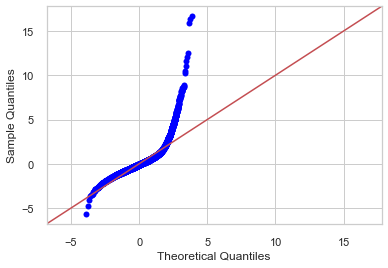

In [482]:
# Check to see if model residuals follow a normal distribution using a QQ plot 
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

### Results:
- From the QQ plot, you can see that there are some outliers skewing the visualization, however with a Durbin-Watson score of 1.981, the **model meets the normality assumption**.  An acceptable range for a Durbin-Watson score is between 1.5 and 2.5 

### Homoskedasticity Check 

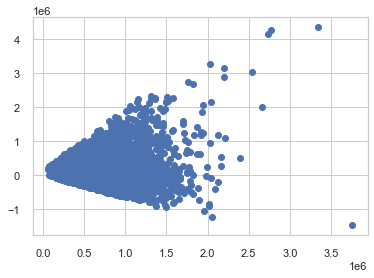

In [483]:
## Check for Homoskedasticity
plt. scatter(x=model.fittedvalues, y=model.resid);

### Results:
- Given the scatter plot above, this model **does not meet the homoscedasticity assumption**. 

## Model1 

### Log, transform, and normalize price 

In [485]:
#log transform and normalize
kchd_cont = kchd[continuous]

#log features
log_names = [f'{column}_log' for column in kchd_cont.columns]

kchd_log = np.log(kchd_cont)
kchd_log.columns = log_names

#normalize (subtract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

kchd_log_norm = kchd_log.apply(normalize)

In [486]:
kchd_log_norm

,sqft_living_log,price_log
0,-1.13,-1.40
1,0.71,0.28
2,-2.13,-1.80
3,0.07,0.50
4,-0.29,0.18
...,...,...
21592,-0.51,-0.48
21593,0.46,-0.28
21594,-1.47,-0.27
21595,-0.41,-0.28


In [487]:
# Combine Continuous and Categorical
preprocessed = pd.concat([kchd_log_norm, kchd], axis=1)
preprocessed.head()

,sqft_living_log,price_log,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade
0,-1.13,-1.40,221900.00,3,1.00,1180,1.00,0,3,7
1,0.71,0.28,538000.00,3,2.25,2570,2.00,0,3,7
2,-2.13,-1.80,180000.00,2,1.00,770,1.00,0,3,6
3,0.07,0.50,604000.00,4,3.00,1960,1.00,0,5,7
4,-0.29,0.18,510000.00,3,2.00,1680,1.00,0,3,8


In [488]:
## add constant
y = preprocessed['price_log']
X1 = sm.add_constant(preprocessed['sqft_living'])
X.head()

,const,sqft_living
0,1.00,1180
1,1.00,2570
2,1.00,770
3,1.00,1960
4,1.00,1680


In [489]:
model1 = sm.OLS(y, X1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 2.020e+04
Date:                Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:19:44   Log-Likelihood:                -23513.
No. Observations:               21596   AIC:                         4.703e+04
Df Residuals:                   21594   BIC:                         4.705e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -1.5753      0.012   -130.025      0.000      -1.599      -1.552
sqft_living     0.0008   5.33e-06    142.125      0.000       0.001       0.001
==============================================================================
Omnibus:                        3.543   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                3.564
Skew:                           0.028   Prob(JB):                        0.168
Kurtosis:                       2.973   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Results:
- The R-squared for our new model decreased slightly from 0.493 to 0.483 
- Durbin-Watson score is in the acceptable range for normality. 

### Normality Check

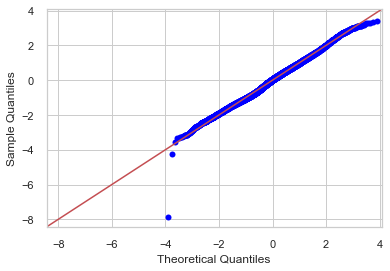

In [490]:
# Check to see if model residuals follow a normal distribution using a QQ plot 
residuals1 = model1.resid
fig = sm.graphics.qqplot(residuals1, dist=stats.norm, line='45', fit=True)

### Results:
- From the QQ plot, the model is getting better and with a Durbin-Watson score of 1.977, the **model meets the normality assumption**.

### Homoskedasticity Check 

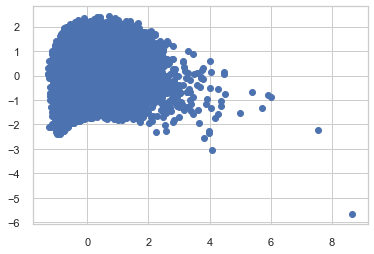

In [491]:
## Check for Homoskedasticity
plt. scatter(x=model1.fittedvalues, y=model1.resid);

### Results:
- Given the scatter plot above, this model **does not meet the homoscedasticity assumption**. 

## Model 2

### Add all features to OLS model

In [492]:
# Revisit the dataset 
preprocessed.head()

,sqft_living_log,price_log,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade
0,-1.13,-1.40,221900.00,3,1.00,1180,1.00,0,3,7
1,0.71,0.28,538000.00,3,2.25,2570,2.00,0,3,7
2,-2.13,-1.80,180000.00,2,1.00,770,1.00,0,3,6
3,0.07,0.50,604000.00,4,3.00,1960,1.00,0,5,7
4,-0.29,0.18,510000.00,3,2.00,1680,1.00,0,3,8


In [493]:


#create predictors
X2 = preprocessed.drop(['price_log', 'sqft_living_log', 'price'], axis=1)
y = preprocessed['price_log']

#create model intercept
X_int = sm.add_constant(X2)

# fit model to data
model2 = sm.OLS(y, X_int).fit()



In [494]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     4272.
Date:                Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:19:44   Log-Likelihood:                -21257.
No. Observations:               21596   AIC:                         4.253e+04
Df Residuals:                   21588   BIC:                         4.259e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -4.2545      0.049    -87.240      0.000      -4.350      -4.159
bedrooms       -0.0430      0.006     -6.827      0.000      -0.055      -0.031
bathrooms      -0.0058      0.010     -0.593      0.553      -0.025       0.013
sqft_living     0.0004   9.58e-06     43.777      0.000       0.000       0.000
floors          0.0343      0.010      3.429      0.001       0.015       0.054
waterfront      1.1288      0.054     20.797      0.000       1.022       1.235
condition       0.1976      0.007     27.958      0.000       0.184       0.211
grade           0.3665      0.006     58.436      0.000       0.354       0.379
==============================================================================
Omnibus:                       15.851   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.713
Skew:                           0.058   Prob(JB):                     0.000387
Kurtosis:                       2.936   Cond. No.                     2.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Results:
- The R-squared has improved from 0.483 to 0.581
- The Durbin-Watson score of 1.977, is still in the acceptable range for Normality. 
- Bathrooms has a p-value greater than 0.05, proving to be statistically insignificant to price and should be removed from the model. 

### Normality Check 

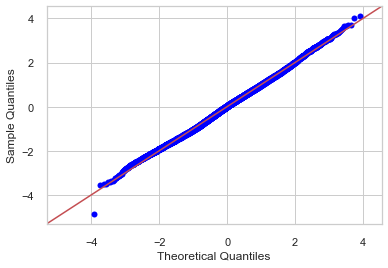

In [495]:
# Check to see if model residuals follow a normal distribution using a QQ plot 
residuals2 = model2.resid
fig = sm.graphics.qqplot(residuals2, dist=stats.norm, line='45', fit=True)

### Results:
- From the QQ plot results, the model's normality assumption still holds with a Durbin-Watson score of 1.977.  **model meets the normality assumption**.

### Homoskedasticity Check

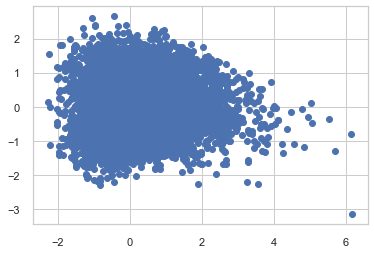

In [496]:
## Check for Homoskedasticity
plt. scatter(x=model2.fittedvalues, y=model2.resid);

### Results:
- Given the scatter plot with its cone like shape, this model **does not meet the homoscedasticity assumption**. 

### Multicollinearity Check 

In [497]:
# Writing a function to create VIF dictionary.
def create_vif_dictionary(X):
    """
    Parameters
    ----------
    X: Pandas dataframe of predictive variables only.
        Should have `.columns` and `.values` attributes.
    """
    
    vif_dct = {}

    # Loop through each row and set the variable name to the VIF. 
    for i in range(len(X.columns)):
        # Calculate VIF
        vif = variance_inflation_factor(X.values, i)
        
        # Extract column name for dictionary key.
        v = X.columns[i]
        
        # Set value in dictionary.
        vif_dct[v] = vif

    return vif_dct

In [498]:
create_vif_dictionary(sm.add_constant(X2))

{'const': 122.46066339242776,
 'bedrooms': 1.6683656381685992,
 'bathrooms': 2.8811136825903882,
 'sqft_living': 3.984057257596944,
 'floors': 1.5008510928466368,
 'waterfront': 1.0186462083218444,
 'condition': 1.0887169675013981,
 'grade': 2.7870959299699294}

### Results: 
- If the VIF is greater than 5, then the explanatory variable is highly collinear with the other explanatory variables. 
- With model 2, **multicollinearity does not exist**. 

## Model 3

In [499]:
preprocessed.head()

,sqft_living_log,price_log,price,bedrooms,bathrooms,sqft_living,floors,waterfront,condition,grade
0,-1.13,-1.40,221900.00,3,1.00,1180,1.00,0,3,7
1,0.71,0.28,538000.00,3,2.25,2570,2.00,0,3,7
2,-2.13,-1.80,180000.00,2,1.00,770,1.00,0,3,6
3,0.07,0.50,604000.00,4,3.00,1960,1.00,0,5,7
4,-0.29,0.18,510000.00,3,2.00,1680,1.00,0,3,8


In [500]:
# add predictors
X3 = preprocessed.drop(['sqft_living_log', 'price_log', 'price', 'bathrooms'], axis=1)
y = preprocessed['price_log']

In [501]:
X_int = sm.add_constant(X3)
model3 = sm.OLS(y, X_int).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     4984.
Date:                Tue, 16 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:19:44   Log-Likelihood:                -21257.
No. Observations:               21596   AIC:                         4.253e+04
Df Residuals:                   21589   BIC:                         4.258e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -4.2530      0.049    -87.322      0.000      -4.348      -4.158
bedrooms       -0.0437      0.006     -7.087      0.000      -0.056      -0.032
sqft_living     0.0004   8.75e-06     47.675      0.000       0.000       0.000
floors          0.0323      0.009      3.426      0.001       0.014       0.051
waterfront      1.1289      0.054     20.799      0.000       1.023       1.235
condition       0.1978      0.007     27.990      0.000       0.184       0.212
grade           0.3660      0.006     58.892      0.000       0.354       0.378
==============================================================================
Omnibus:                       16.276   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.139
Skew:                           0.059   Prob(JB):                     0.000313
Kurtosis:                       2.936   Cond. No.                     2.80e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Results:
- After removing bathrooms, the R-squared remained the same at 0.581.
- Durbin-Watson score also remained the same at 1.977

### Normality Check 

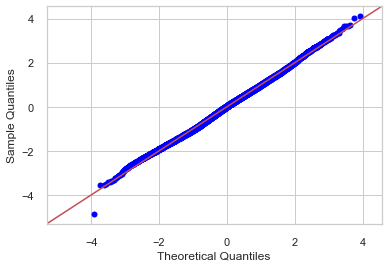

In [502]:
# Check to see if model residuals follow a normal distribution using a QQ plot 
residuals3 = model3.resid
fig = sm.graphics.qqplot(residuals3, dist=stats.norm, line='45', fit=True)

- From the QQ plot, the model remains the same in terms of the Durbin-Watson score of 1.977, and **model meets the normality assumption**.

### Homoskedasticity Check


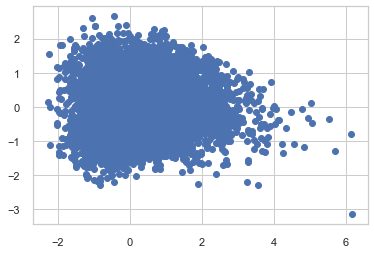

In [503]:
## Check for Homoskedasticity
plt. scatter(x=model3.fittedvalues, y=model3.resid);

### Results:
- Given the scatter plot with its cone like shape, this model **does not meet the homoscedasticity assumption**. 

### Multicollinearity Check 

In [504]:
# Check for mulitcollinearity with variance_inflation_factor
create_vif_dictionary(sm.add_constant(X3))

{'const': 122.15187145883901,
 'bedrooms': 1.602146297579926,
 'sqft_living': 3.3223806029334537,
 'floors': 1.3356284661252429,
 'waterfront': 1.0186365961674506,
 'condition': 1.0876932031556439,
 'grade': 2.736671884404993}

### Results:
- **Multicollinearity does not exist**. 

# Recommendations
---

In the final model with all features excluding ``bathrooms``, ``yr_built``, and ``sqft_lot``, our model's performance based on the adjusted R-squared improved from 0.493 to 0.581. 

In the final model, all features included in the model have statistical significance relationship with price.  All p-values are less than 0.05. 

**Coefficient Interpretations:**
- For every bedroom added to a home, it decreases the price of the home by 4.4%
- For every square foot of living added to a home, it increases the price of a home by 0.04%
- For every floor added to a home, it increases the price of a home by 3.2%
- For every increase in condition to a home, it increases the price of a home by 19.8%
- For every increase in the grade of a home, it increases the price of a home by 36.6%

**Conclusions for King County Realtors:**
1. In order to maximize the price of a home, you should recommend to your clients that they should use great quality      products when rennovating their home to increase the grade of their home to highest possible level.  
2. If the seller is wanting to expand the size of their home, creating another floor is a great option to increase the    price of their home. For a 500,000 dollar home, adding one floor would increase the price by 16,000.
3. Improving your home's condition to a minimum average condition, will increase your home's value. 
---
Our model only explains 58 percent of the variation in sale price, so we must tread with caution with our predictions. Our final model does not hold true every assumption of linear regression, and violaties the rule of homoscedasticity. 

**Future Work:**
- Add more features to see the model's R-squared increases, and becomes more accurate. 